# Classification Practice Problem 1
This is my first self-made practice problem, in which I will be using logistic regression to predict positive and negative outcomes of new data.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In this practice problem, there will be two features (x_0 and x_1) and one target y. Below, the training set is given:

In [2]:
X_train = np.array([[1,1],[4,3],[10,2],[8,0.5],[15,1],[11,0.4],[13,6],[9,9],[5,12],[3.3,7.8],[14.9,9.8],[6.5,6.9],[2.4,10.5],[6.2,4],[1.7,7.9],[4.3,5.9],[8.3,4],[12,4.1]])
y_train = np.array([0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0])
print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}")

X_train dimensions: (18, 2)
y_train dimensions: (18,)


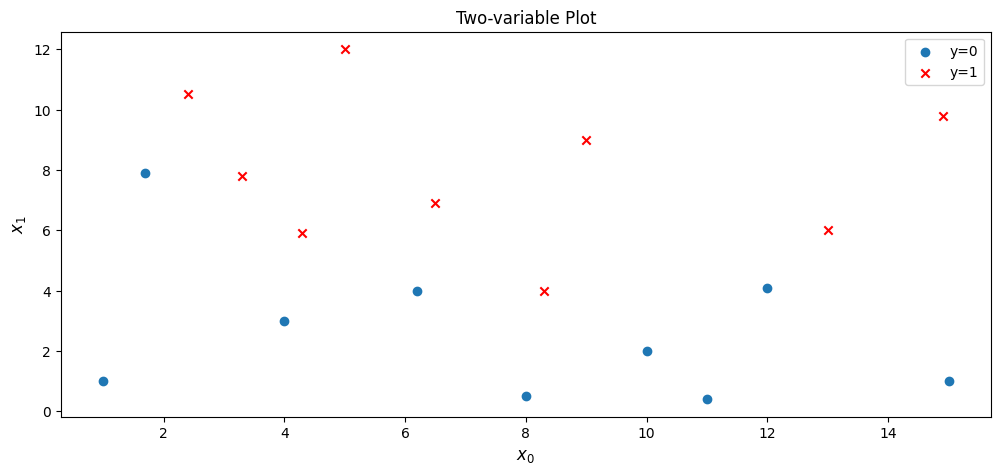

In [3]:
pos = y_train == 1
neg = y_train == 0
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.scatter(X_train[neg,0],X_train[neg,1],marker='o', label = "y=0")
ax.scatter(X_train[pos,0],X_train[pos,1],marker='x', color = 'red', label = "y=1")
ax.set_xlabel("$x_0$", fontsize = 12)
ax.set_ylabel("$x_1$", fontsize = 12)
ax.set_title("Two-variable Plot")
ax.legend()

The goal is to create a model which can predict the value of y, given a pair of feature values which is not already in the training set.
We will use the sigmoid function as a model for our prediction:
$$\newline f_{w,b}(\textbf{x}^{(i)}) = \frac{1}{1+e^{-z}}, $$
where
$$z = \textbf{w}\cdot\textbf{x} + b$$ The goal is then to find the right parameters, $\textbf{w}$ and $b$, that optimize the model.

For each training example (indexed by $i$), the error (or loss) of the prediction is given by
$$ loss(f_{w,b}(\mathbf{x}^{(i)}),y^{(i)}) = -y^{(i)}\log\left(f_{w,b}(\mathbf{x}^{(i)})\right) - (1-y^{(i)})\log\left(1-f_{w,b}(\mathbf{x}^{(i)})\right) $$

The normalized total cost is then the sum of the losses of each training example:
$$J(\textbf{w},b) = \frac{1}{m}\sum\limits_{i=0}^{m-1}loss(f_{w,b}(\mathbf{x}^{(i)}),y^{(i)})$$

In [4]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    J = 0
    for i in range(m):
        z_i = np.dot(x[i],w) + b
        f_wb_i = 1/(1+np.exp(-z_i))
        loss = -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
        J = J + loss
    J = J/m
    return J

In [5]:
#Testing cost function with all parameters set to zero
w_tmp = np.zeros(len(X_train[0]))
b_tmp = 0
compute_cost(X_train,y_train,w_tmp,b_tmp)

0.6931471805599453

The next step is to compute the gradient of J with respect to each parameter.
$$\frac{dJ}{dw_j}=\frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{w,b}(\mathbf{x}^{(i)}) - y^{(i)})x^{(i)}_j$$
$$\frac{dJ}{db} = \frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{w,b}(\mathbf{x}^{(i)}) - y^{(i)})$$

In [6]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    n = x.shape[1]
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        z_i = np.dot(x[i],w) + b
        f_wb_i = 1/(1+np.exp(-z_i))
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*x[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db

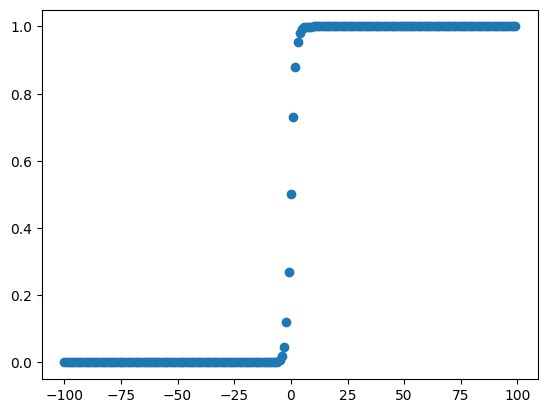

In [7]:
xvar = np.arange(-100,100,1)
yvar = 1/(1+np.exp(-xvar))
plt.scatter(xvar,yvar)

To perform gradient descent, we perform the following updates:
$$w_j \rightarrow w_j - \alpha\frac{dJ}{dw_j}$$
$$b \rightarrow b - \alpha\frac{dJ}{db}$$

In [8]:
def gradient_descent(x,y,w_in,b_in,alpha,iter):
    m = x.shape[0]
    n = x.shape[1]
    J_hist = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(iter):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        if i < 10000:
            J_hist.append(compute_cost(x,y,w,b))
        if i % math.ceil(iter/10) == 0:
            print(f"Iteration {i}: Cost = {J_hist[-1]}")
    return w,b,J_hist

In [9]:
w,b,J_hist = gradient_descent(X_train,y_train,w_tmp,b_tmp,0.1,5000)

Iteration 0: Cost = 0.5943601940164595
Iteration 500: Cost = 0.3480604257322973
Iteration 1000: Cost = 0.3180723338847179
Iteration 1500: Cost = 0.30648860969143255
Iteration 2000: Cost = 0.3007497241480503
Iteration 2500: Cost = 0.29753050138532616
Iteration 3000: Cost = 0.2955856089484775
Iteration 3500: Cost = 0.294351514311283
Iteration 4000: Cost = 0.2935408634391215
Iteration 4500: Cost = 0.2929945965060988


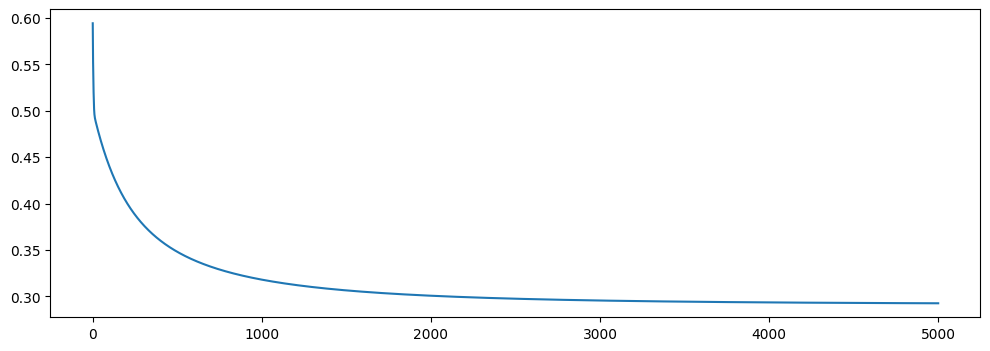

In [10]:
fig, ax = plt.subplots(1,1,figsize = (12,4))
ax.plot(J_hist)

In [11]:
print(f"Optimal parameters: w = {w}, b = {b}")

Optimal parameters: w = [0.226702   0.94781805], b = -6.571747882253834


To find the decision boundary, $z = w_0x_0 + w_1x_1 + b = 0$, and so
$$x_1 = \frac{-(w_0x_0+b)}{w_1}$$

In [12]:
bound = lambda x: -(w[0]*x+b)/(w[1])
boundx = np.arange(0,15,0.25)
boundy = bound(boundx)

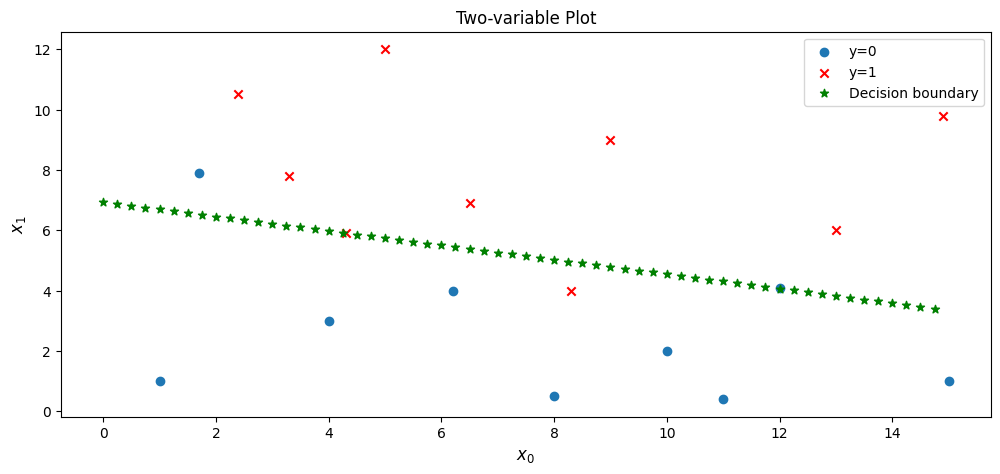

In [13]:
pos = y_train == 1
neg = y_train == 0
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.scatter(X_train[neg,0],X_train[neg,1],marker='o', label = "y=0")
ax.scatter(X_train[pos,0],X_train[pos,1],marker='x', color = 'red', label = "y=1")
ax.scatter(boundx,boundy,color="green",marker = '*', label = "Decision boundary")
ax.set_xlabel("$x_0$", fontsize = 12)
ax.set_ylabel("$x_1$", fontsize = 12)
ax.set_title("Two-variable Plot")
ax.legend()

What if we use a different model? Say,
$$z=w_0x_0 + w_1x_1 + w_2x_0^2 + w_3x_1^2 + w_4x_0x_1$$
Let's modify our training set to include these new features

In [14]:
print(X_train)

[[ 1.   1. ]
 [ 4.   3. ]
 [10.   2. ]
 [ 8.   0.5]
 [15.   1. ]
 [11.   0.4]
 [13.   6. ]
 [ 9.   9. ]
 [ 5.  12. ]
 [ 3.3  7.8]
 [14.9  9.8]
 [ 6.5  6.9]
 [ 2.4 10.5]
 [ 6.2  4. ]
 [ 1.7  7.9]
 [ 4.3  5.9]
 [ 8.3  4. ]
 [12.   4.1]]


In [15]:
X_train2 = np.c_[X_train[:,0],X_train[:,1],X_train[:,0]**2,X_train[:,1]**2,X_train[:,0]*X_train[:,1]]
print(X_train2)
print(y_train)

[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [4.0000e+00 3.0000e+00 1.6000e+01 9.0000e+00 1.2000e+01]
 [1.0000e+01 2.0000e+00 1.0000e+02 4.0000e+00 2.0000e+01]
 [8.0000e+00 5.0000e-01 6.4000e+01 2.5000e-01 4.0000e+00]
 [1.5000e+01 1.0000e+00 2.2500e+02 1.0000e+00 1.5000e+01]
 [1.1000e+01 4.0000e-01 1.2100e+02 1.6000e-01 4.4000e+00]
 [1.3000e+01 6.0000e+00 1.6900e+02 3.6000e+01 7.8000e+01]
 [9.0000e+00 9.0000e+00 8.1000e+01 8.1000e+01 8.1000e+01]
 [5.0000e+00 1.2000e+01 2.5000e+01 1.4400e+02 6.0000e+01]
 [3.3000e+00 7.8000e+00 1.0890e+01 6.0840e+01 2.5740e+01]
 [1.4900e+01 9.8000e+00 2.2201e+02 9.6040e+01 1.4602e+02]
 [6.5000e+00 6.9000e+00 4.2250e+01 4.7610e+01 4.4850e+01]
 [2.4000e+00 1.0500e+01 5.7600e+00 1.1025e+02 2.5200e+01]
 [6.2000e+00 4.0000e+00 3.8440e+01 1.6000e+01 2.4800e+01]
 [1.7000e+00 7.9000e+00 2.8900e+00 6.2410e+01 1.3430e+01]
 [4.3000e+00 5.9000e+00 1.8490e+01 3.4810e+01 2.5370e+01]
 [8.3000e+00 4.0000e+00 6.8890e+01 1.6000e+01 3.3200e+01]
 [1.2000e+01 4

In [16]:
w_in = np.zeros(len(X_train2[0]))
b_in = 0

In [30]:
w,b,J_hist = gradient_descent(X_train2,y_train,w_in,b_in,0.003,5000)

Iteration 0: Cost = 0.6023697310924804
Iteration 500: Cost = 0.23841678304354744
Iteration 1000: Cost = 0.20300791477982694
Iteration 1500: Cost = 0.1820787717872629
Iteration 2000: Cost = 0.1675971480053068
Iteration 2500: Cost = 0.15673131854162478
Iteration 3000: Cost = 0.14819732314082612
Iteration 3500: Cost = 0.1412928020923264
Iteration 4000: Cost = 0.1355840694168583
Iteration 4500: Cost = 0.1307823978224757


Text(0.5, 0.98, 'Evolution of cost over 5000 iterations')

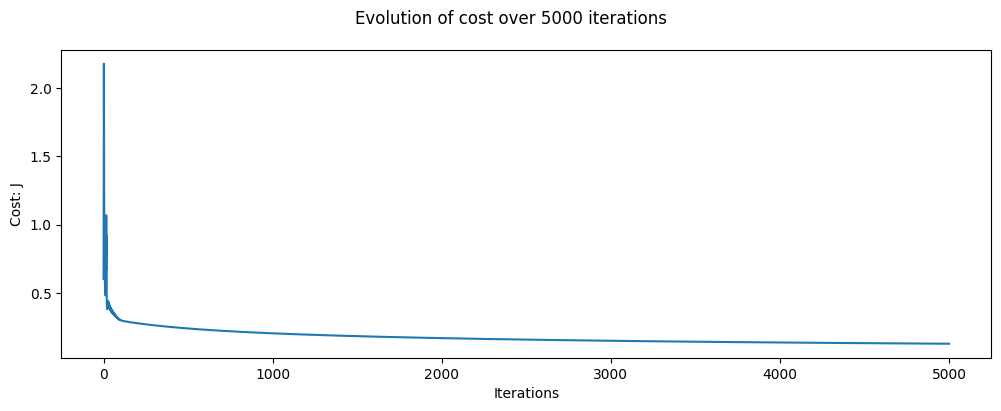

In [31]:
fig, ax = plt.subplots(1,1,figsize = (12,4))
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost: J")
ax.plot(J_hist)
fig.suptitle("Evolution of cost over 5000 iterations")

To plot the new decision boundary, we must set $z=0$ once again. This time,
$$z=w_0x_0 + w_1x_1 + w_2x_0^2 + w_3x_1^2 + w_4x_0x_1 + b = 0$$

In [32]:
def decision_bound(x0range,x1range,w,b):
    thresh_coords = []
    x0_pts = np.arange(0,x0range,0.1)
    x1_pts = np.arange(0,x1range,0.1)
    for i in range(len(x0_pts)):
        for j in range(len(x1_pts)):
            z = w[0]*x0_pts[i] + w[1]*x1_pts[j] + w[2]*(x0_pts[i]**2) + w[3]*(x1_pts[j]**2) + w[4]*x0_pts[i]*x1_pts[j] + b
            if z > -0.1 and z < 0.1:
                thresh_coords.append([x0_pts[i],x1_pts[j]])
    thresh_array = np.zeros([len(thresh_coords),2])
    for i in range(len(thresh_coords)):
        thresh_array[i] = thresh_coords[i]
    return thresh_array

In [71]:
boundary = decision_bound(15,12,w,b)
boundary #The coordinates in this array satisfy the decision boundary conditions that z ~ 0

array([[ 1.7, 11.5],
       [ 1.7, 11.6],
       [ 1.7, 11.7],
       [ 1.7, 11.8],
       [ 1.8, 10.6],
       [ 1.8, 10.7],
       [ 1.8, 10.8],
       [ 1.8, 10.9],
       [ 1.9,  9.8],
       [ 1.9,  9.9],
       [ 1.9, 10. ],
       [ 1.9, 10.1],
       [ 2. ,  9.1],
       [ 2. ,  9.2],
       [ 2. ,  9.3],
       [ 2.1,  8.4],
       [ 2.1,  8.5],
       [ 2.1,  8.6],
       [ 2.1,  8.7],
       [ 2.2,  7.9],
       [ 2.2,  8. ],
       [ 2.2,  8.1],
       [ 2.3,  7.4],
       [ 2.3,  7.5],
       [ 2.3,  7.6],
       [ 2.4,  7. ],
       [ 2.4,  7.1],
       [ 2.4,  7.2],
       [ 2.5,  6.6],
       [ 2.5,  6.7],
       [ 2.5,  6.8],
       [ 2.6,  6.3],
       [ 2.6,  6.4],
       [ 2.6,  6.5],
       [ 2.7,  6. ],
       [ 2.7,  6.1],
       [ 2.7,  6.2],
       [ 2.8,  5.8],
       [ 2.8,  5.9],
       [ 2.8,  6. ],
       [ 2.9,  5.6],
       [ 2.9,  5.7],
       [ 3. ,  5.4],
       [ 3. ,  5.5],
       [ 3. ,  5.6],
       [ 3.1,  5.3],
       [ 3.1,  5.4],
       [ 3.2,

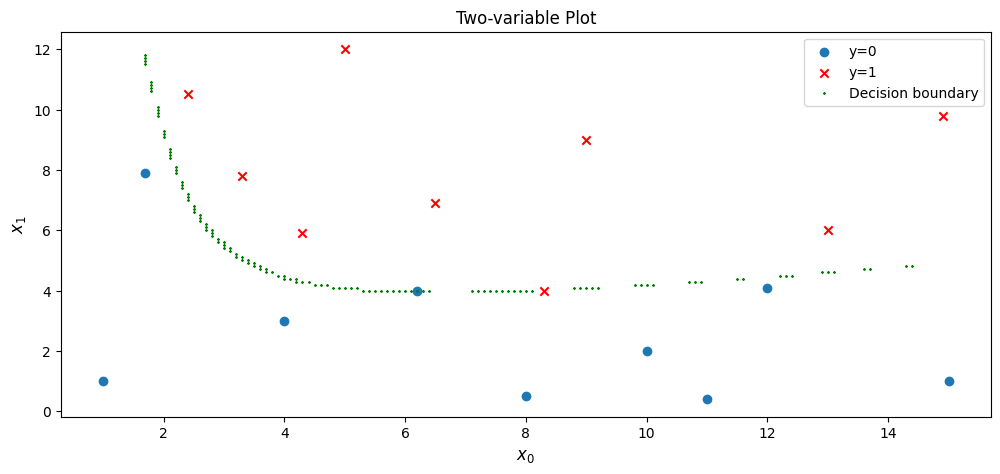

In [34]:
pos = y_train == 1
neg = y_train == 0
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.scatter(X_train[neg,0],X_train[neg,1],marker='o', label = "y=0")
ax.scatter(X_train[pos,0],X_train[pos,1],marker='x', color = 'red', label = "y=1")
ax.scatter(boundary[:,0],boundary[:,1],color="green",marker = '*', label = "Decision boundary",s=1)
ax.set_xlabel("$x_0$", fontsize = 12)
ax.set_ylabel("$x_1$", fontsize = 12)
ax.set_title("Two-variable Plot")
ax.legend()

Let's now implement logistic regression on the same traianing set, using scikit-learn

In [22]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr_model = LogisticRegression()
lr_model.fit(X_train2,y_train)

LogisticRegression()

In [29]:
y_predict = lr_model.predict(X_train2)
y_predict == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])